In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(363861, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [92]:
new_df = df.sample(30000,random_state=2)

In [93]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
q1_len          0
q2_len          0
q1_num_words    0
q2_num_words    0
word_common     0
word_total      0
word_share      0
dtype: int64

In [94]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
289024,289024,20941,8014,What should I do in order not to care about wh...,"As an individual, do I really need to care wha...",1,68.0,70.0,15,14,9,28,0.32
3454,3454,6846,6847,Why AAP’s MLA Dinesh Mohaniya has been arrested?,What are your views on the latest sex scandal ...,0,48.0,71.0,8,14,1,22,0.05
92547,92547,154928,154929,Requisites to become first time app developer?,What Jobs are available on Cruise Ships for a ...,0,46.0,61.0,7,11,0,18,0.00
102544,102544,10473,2581,Is it possible to time travel to past?,Is time travel still theorized as being possible?,1,38.0,49.0,8,8,3,15,0.20
173136,173136,267166,267167,What preparation you should make before gettin...,How should you prepare your body before gettin...,1,57.0,57.0,8,9,5,17,0.29


In [95]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
q1_len          0
q2_len          0
q1_num_words    0
q2_num_words    0
word_common     0
word_total      0
word_share      0
dtype: int64

In [96]:
new_df.duplicated().sum()

0

is_duplicate
0    18863
1    11137
Name: count, dtype: int64
is_duplicate
0    62.876667
1    37.123333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

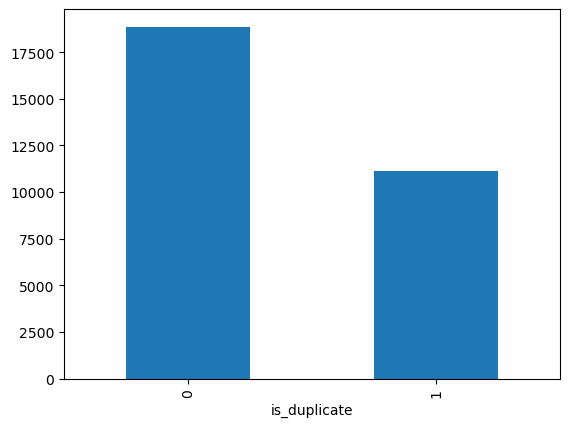

In [97]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [98]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55498
Number of questions getting repeated 3312


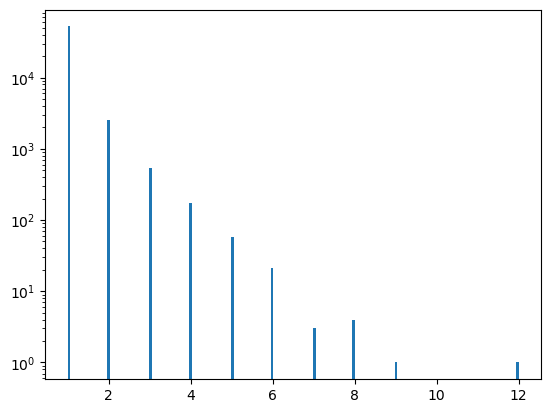

In [99]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [100]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [101]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
289024,289024,20941,8014,What should I do in order not to care about wh...,"As an individual, do I really need to care wha...",1,68,70,15,14,9,28,0.32
3454,3454,6846,6847,Why AAP’s MLA Dinesh Mohaniya has been arrested?,What are your views on the latest sex scandal ...,0,48,71,8,14,1,22,0.05
92547,92547,154928,154929,Requisites to become first time app developer?,What Jobs are available on Cruise Ships for a ...,0,46,61,7,11,0,18,0.00
102544,102544,10473,2581,Is it possible to time travel to past?,Is time travel still theorized as being possible?,1,38,49,8,8,3,15,0.20
173136,173136,267166,267167,What preparation you should make before gettin...,How should you prepare your body before gettin...,1,57,57,8,9,5,17,0.29


In [102]:
# Replace NaN values with an empty string and ensure all entries are strings
new_df['question1'] = new_df['question1'].fillna("").astype(str)
new_df['question2'] = new_df['question2'].fillna("").astype(str)

# Calculate the number of words in question1 and question2
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split()))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split()))

# Display the first few rows of the dataframe
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
289024,289024,20941,8014,What should I do in order not to care about wh...,"As an individual, do I really need to care wha...",1,68,70,15,14,9,28,0.32
3454,3454,6846,6847,Why AAP’s MLA Dinesh Mohaniya has been arrested?,What are your views on the latest sex scandal ...,0,48,71,8,14,1,22,0.05
92547,92547,154928,154929,Requisites to become first time app developer?,What Jobs are available on Cruise Ships for a ...,0,46,61,7,11,0,18,0.00
102544,102544,10473,2581,Is it possible to time travel to past?,Is time travel still theorized as being possible?,1,38,49,8,8,3,15,0.20
173136,173136,267166,267167,What preparation you should make before gettin...,How should you prepare your body before gettin...,1,57,57,8,9,5,17,0.29


In [103]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [104]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
289024,289024,20941,8014,What should I do in order not to care about wh...,"As an individual, do I really need to care wha...",1,68,70,15,14,9,28,0.32
3454,3454,6846,6847,Why AAP’s MLA Dinesh Mohaniya has been arrested?,What are your views on the latest sex scandal ...,0,48,71,8,14,1,22,0.05
92547,92547,154928,154929,Requisites to become first time app developer?,What Jobs are available on Cruise Ships for a ...,0,46,61,7,11,0,18,0.00
102544,102544,10473,2581,Is it possible to time travel to past?,Is time travel still theorized as being possible?,1,38,49,8,8,3,15,0.20
173136,173136,267166,267167,What preparation you should make before gettin...,How should you prepare your body before gettin...,1,57,57,8,9,5,17,0.29


In [105]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [106]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
289024,289024,20941,8014,What should I do in order not to care about wh...,"As an individual, do I really need to care wha...",1,68,70,15,14,9,28,0.32
3454,3454,6846,6847,Why AAP’s MLA Dinesh Mohaniya has been arrested?,What are your views on the latest sex scandal ...,0,48,71,8,14,1,22,0.05
92547,92547,154928,154929,Requisites to become first time app developer?,What Jobs are available on Cruise Ships for a ...,0,46,61,7,11,0,18,0.00
102544,102544,10473,2581,Is it possible to time travel to past?,Is time travel still theorized as being possible?,1,38,49,8,8,3,15,0.20
173136,173136,267166,267167,What preparation you should make before gettin...,How should you prepare your body before gettin...,1,57,57,8,9,5,17,0.29


In [107]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
289024,289024,20941,8014,What should I do in order not to care about wh...,"As an individual, do I really need to care wha...",1,68,70,15,14,9,28,0.32
3454,3454,6846,6847,Why AAP’s MLA Dinesh Mohaniya has been arrested?,What are your views on the latest sex scandal ...,0,48,71,8,14,1,22,0.05
92547,92547,154928,154929,Requisites to become first time app developer?,What Jobs are available on Cruise Ships for a ...,0,46,61,7,11,0,18,0.00
102544,102544,10473,2581,Is it possible to time travel to past?,Is time travel still theorized as being possible?,1,38,49,8,8,3,15,0.20
173136,173136,267166,267167,What preparation you should make before gettin...,How should you prepare your body before gettin...,1,57,57,8,9,5,17,0.29


minimum characters 2
maximum characters 305
average num of characters 59


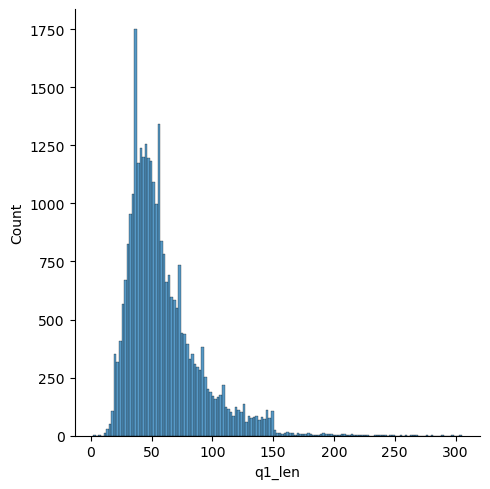

In [108]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 8
maximum characters 1151
average num of characters 60


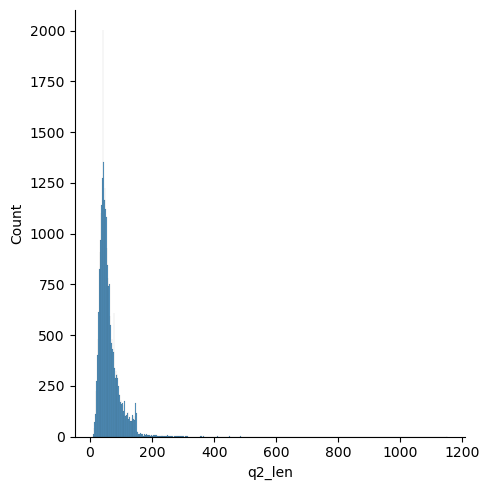

In [109]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 59
average num of words 10


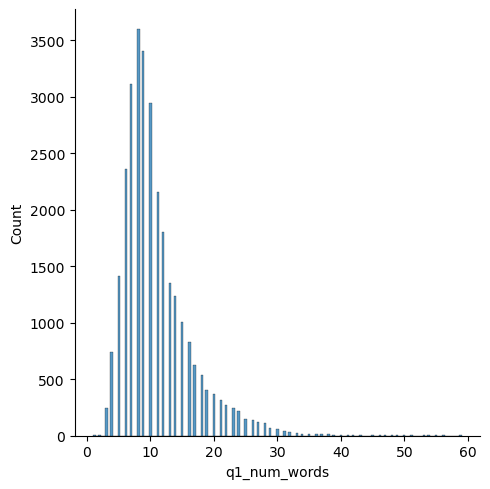

In [110]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


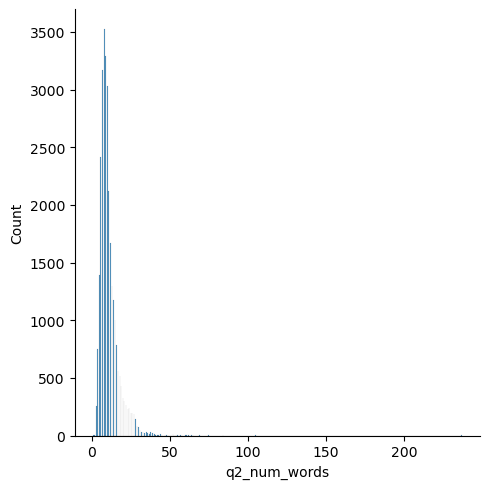

In [111]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

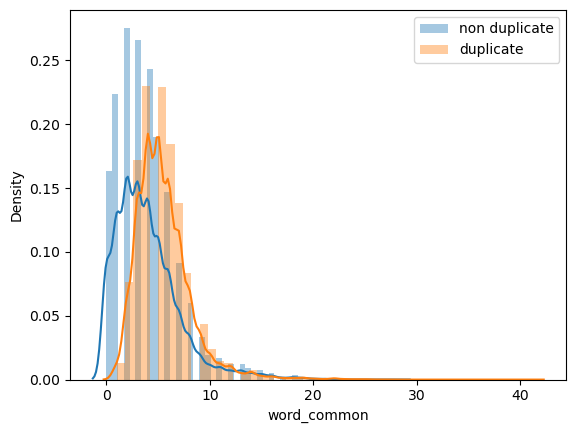

In [112]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

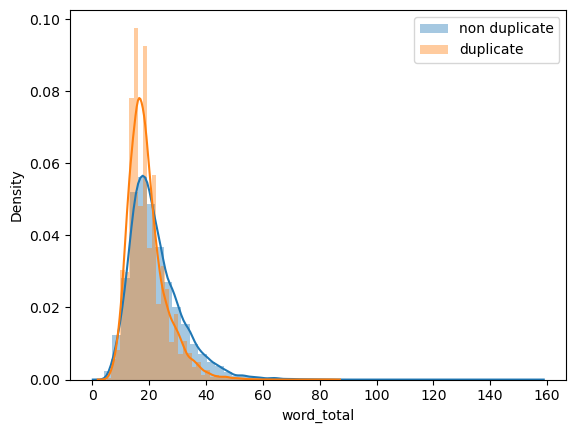

In [113]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

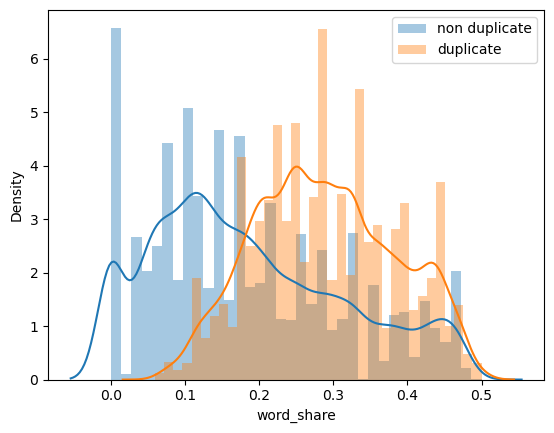

In [114]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [115]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
289024,What should I do in order not to care about wh...,"As an individual, do I really need to care wha..."
3454,Why AAP’s MLA Dinesh Mohaniya has been arrested?,What are your views on the latest sex scandal ...
92547,Requisites to become first time app developer?,What Jobs are available on Cruise Ships for a ...
102544,Is it possible to time travel to past?,Is time travel still theorized as being possible?
173136,What preparation you should make before gettin...,How should you prepare your body before gettin...


In [116]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
289024,1,68,70,15,14,9,28,0.32
3454,0,48,71,8,14,1,22,0.05
92547,0,46,61,7,11,0,18,0.00
102544,1,38,49,8,8,3,15,0.20
173136,1,57,57,8,9,5,17,0.29


In [117]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [118]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [119]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
289024,1,68,70,15,14,9,28,0.32,0,0,...,0,0,0,0,0,0,0,0,0,0
3454,0,48,71,8,14,1,22,0.05,0,0,...,0,0,0,0,0,1,0,0,0,0
92547,0,46,61,7,11,0,18,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
102544,1,38,49,8,8,3,15,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
173136,1,57,57,8,9,5,17,0.29,0,0,...,0,0,1,0,0,1,0,0,0,0


In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7625

In [122]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7661666666666667